<a href="https://colab.research.google.com/github/kal-nemi/Restate.github.io/blob/main/EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. First Installing the required libraries


In [ ]:
!apt-get install poppler-utils

In [ ]:
!pip install easyocr

In [ ]:
!pip install pdf2image

In [ ]:
!pip install gtts

2. Importing the requiements

In [ ]:
import re
import easyocr
import os
import numpy as np
import PIL
from PIL import ImageDraw
from pdf2image import convert_from_path
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize']= 8,16

from gtts import gTTS 




3. Allocating the english model of Easyocr into a variable named reader.

In [ ]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


4. Here, the pages of research paper are stored as a list of images in image.

In [ ]:
image= convert_from_path("metalearning.pdf")

5. Due to the large size and many pages in the pdf we will only take first page and show details of it.

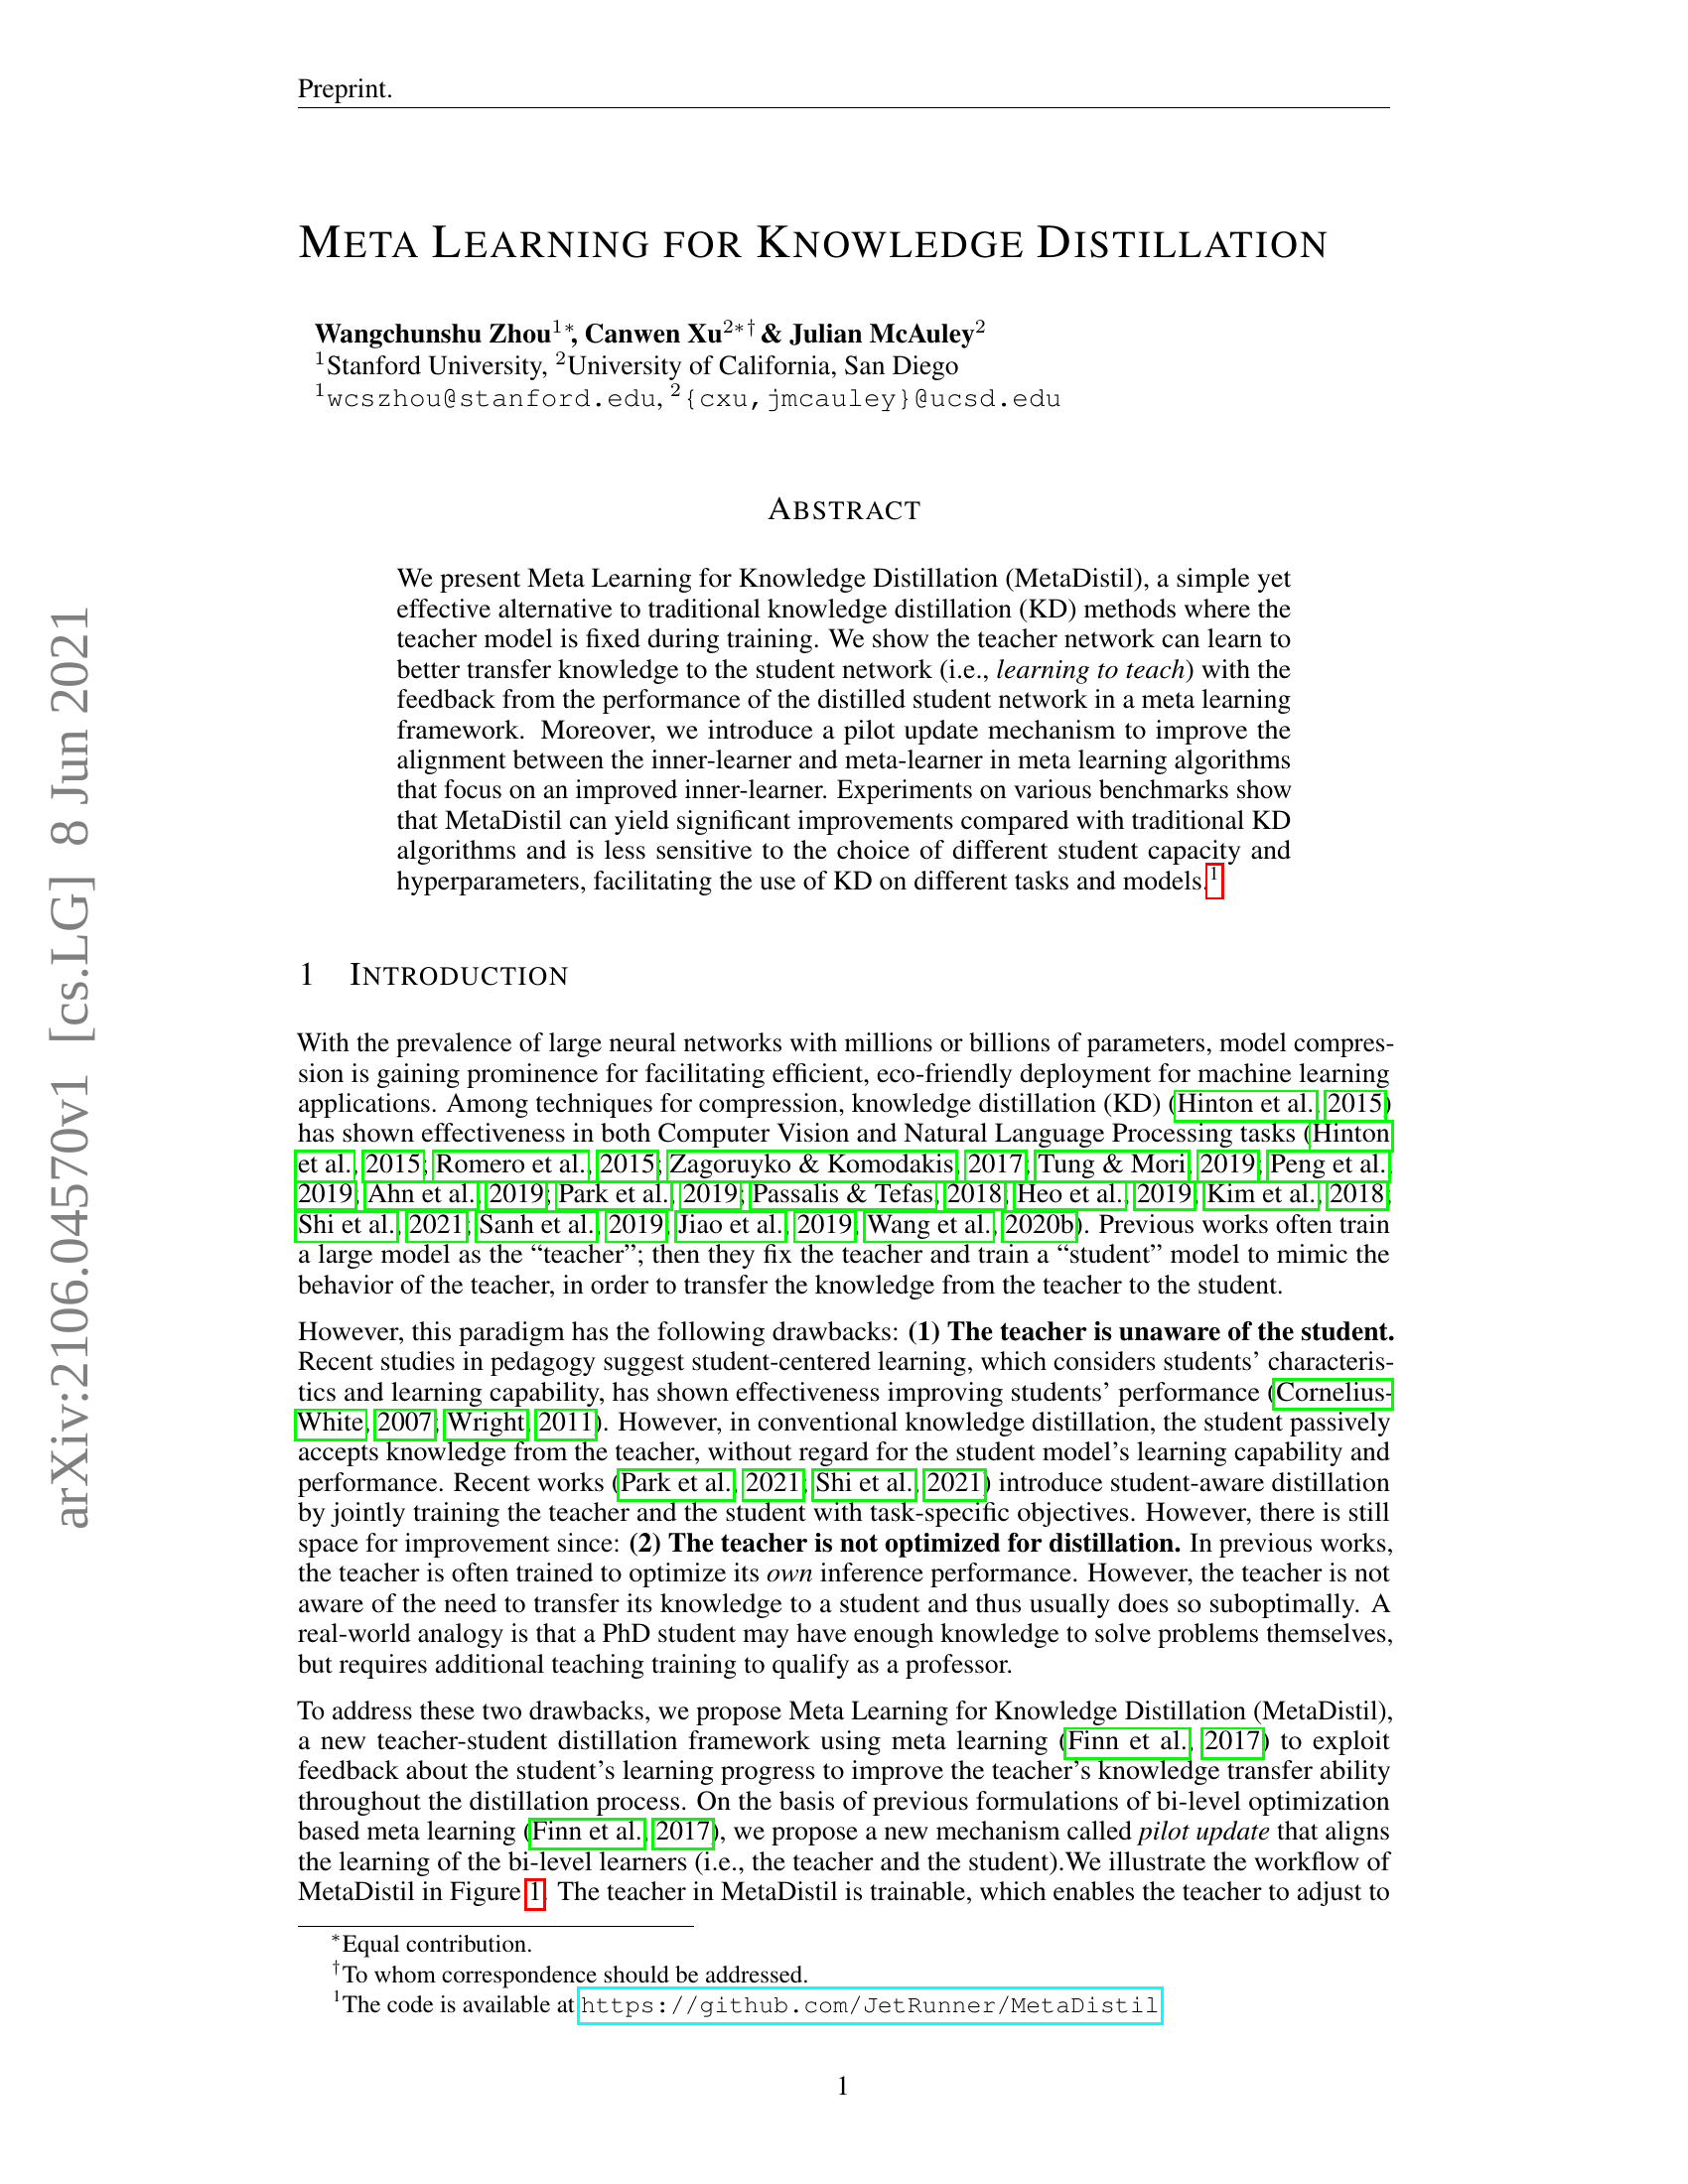

'\nfor i in image:   //uncomment this loop and it will display the whole pdf pages as images\n  display(i)\n'

In [ ]:
from IPython.display import display, Image
display(image[0])
'''
for i in image:   //uncomment this loop and it will display the whole pdf pages as images
  display(i)
'''

6. Creating a variable bounds which will store the text of images as a list in it. You can see the first text it captured (" Preprint ") by last line of the block.

In [ ]:

bounds = reader.readtext(np.array(image[0]))
'''
listoftext=[]
for j in range(len(image)):                     //Uncomment to store the text of all pages
  bounds = reader.readtext(np.array(image[j]))
  listoftext.append(bounds)

print(listoftext)
'''
bounds[0][1]

'Preprint:'

7. Drawbox is a function which shows the input what the ocr has detected into a box .

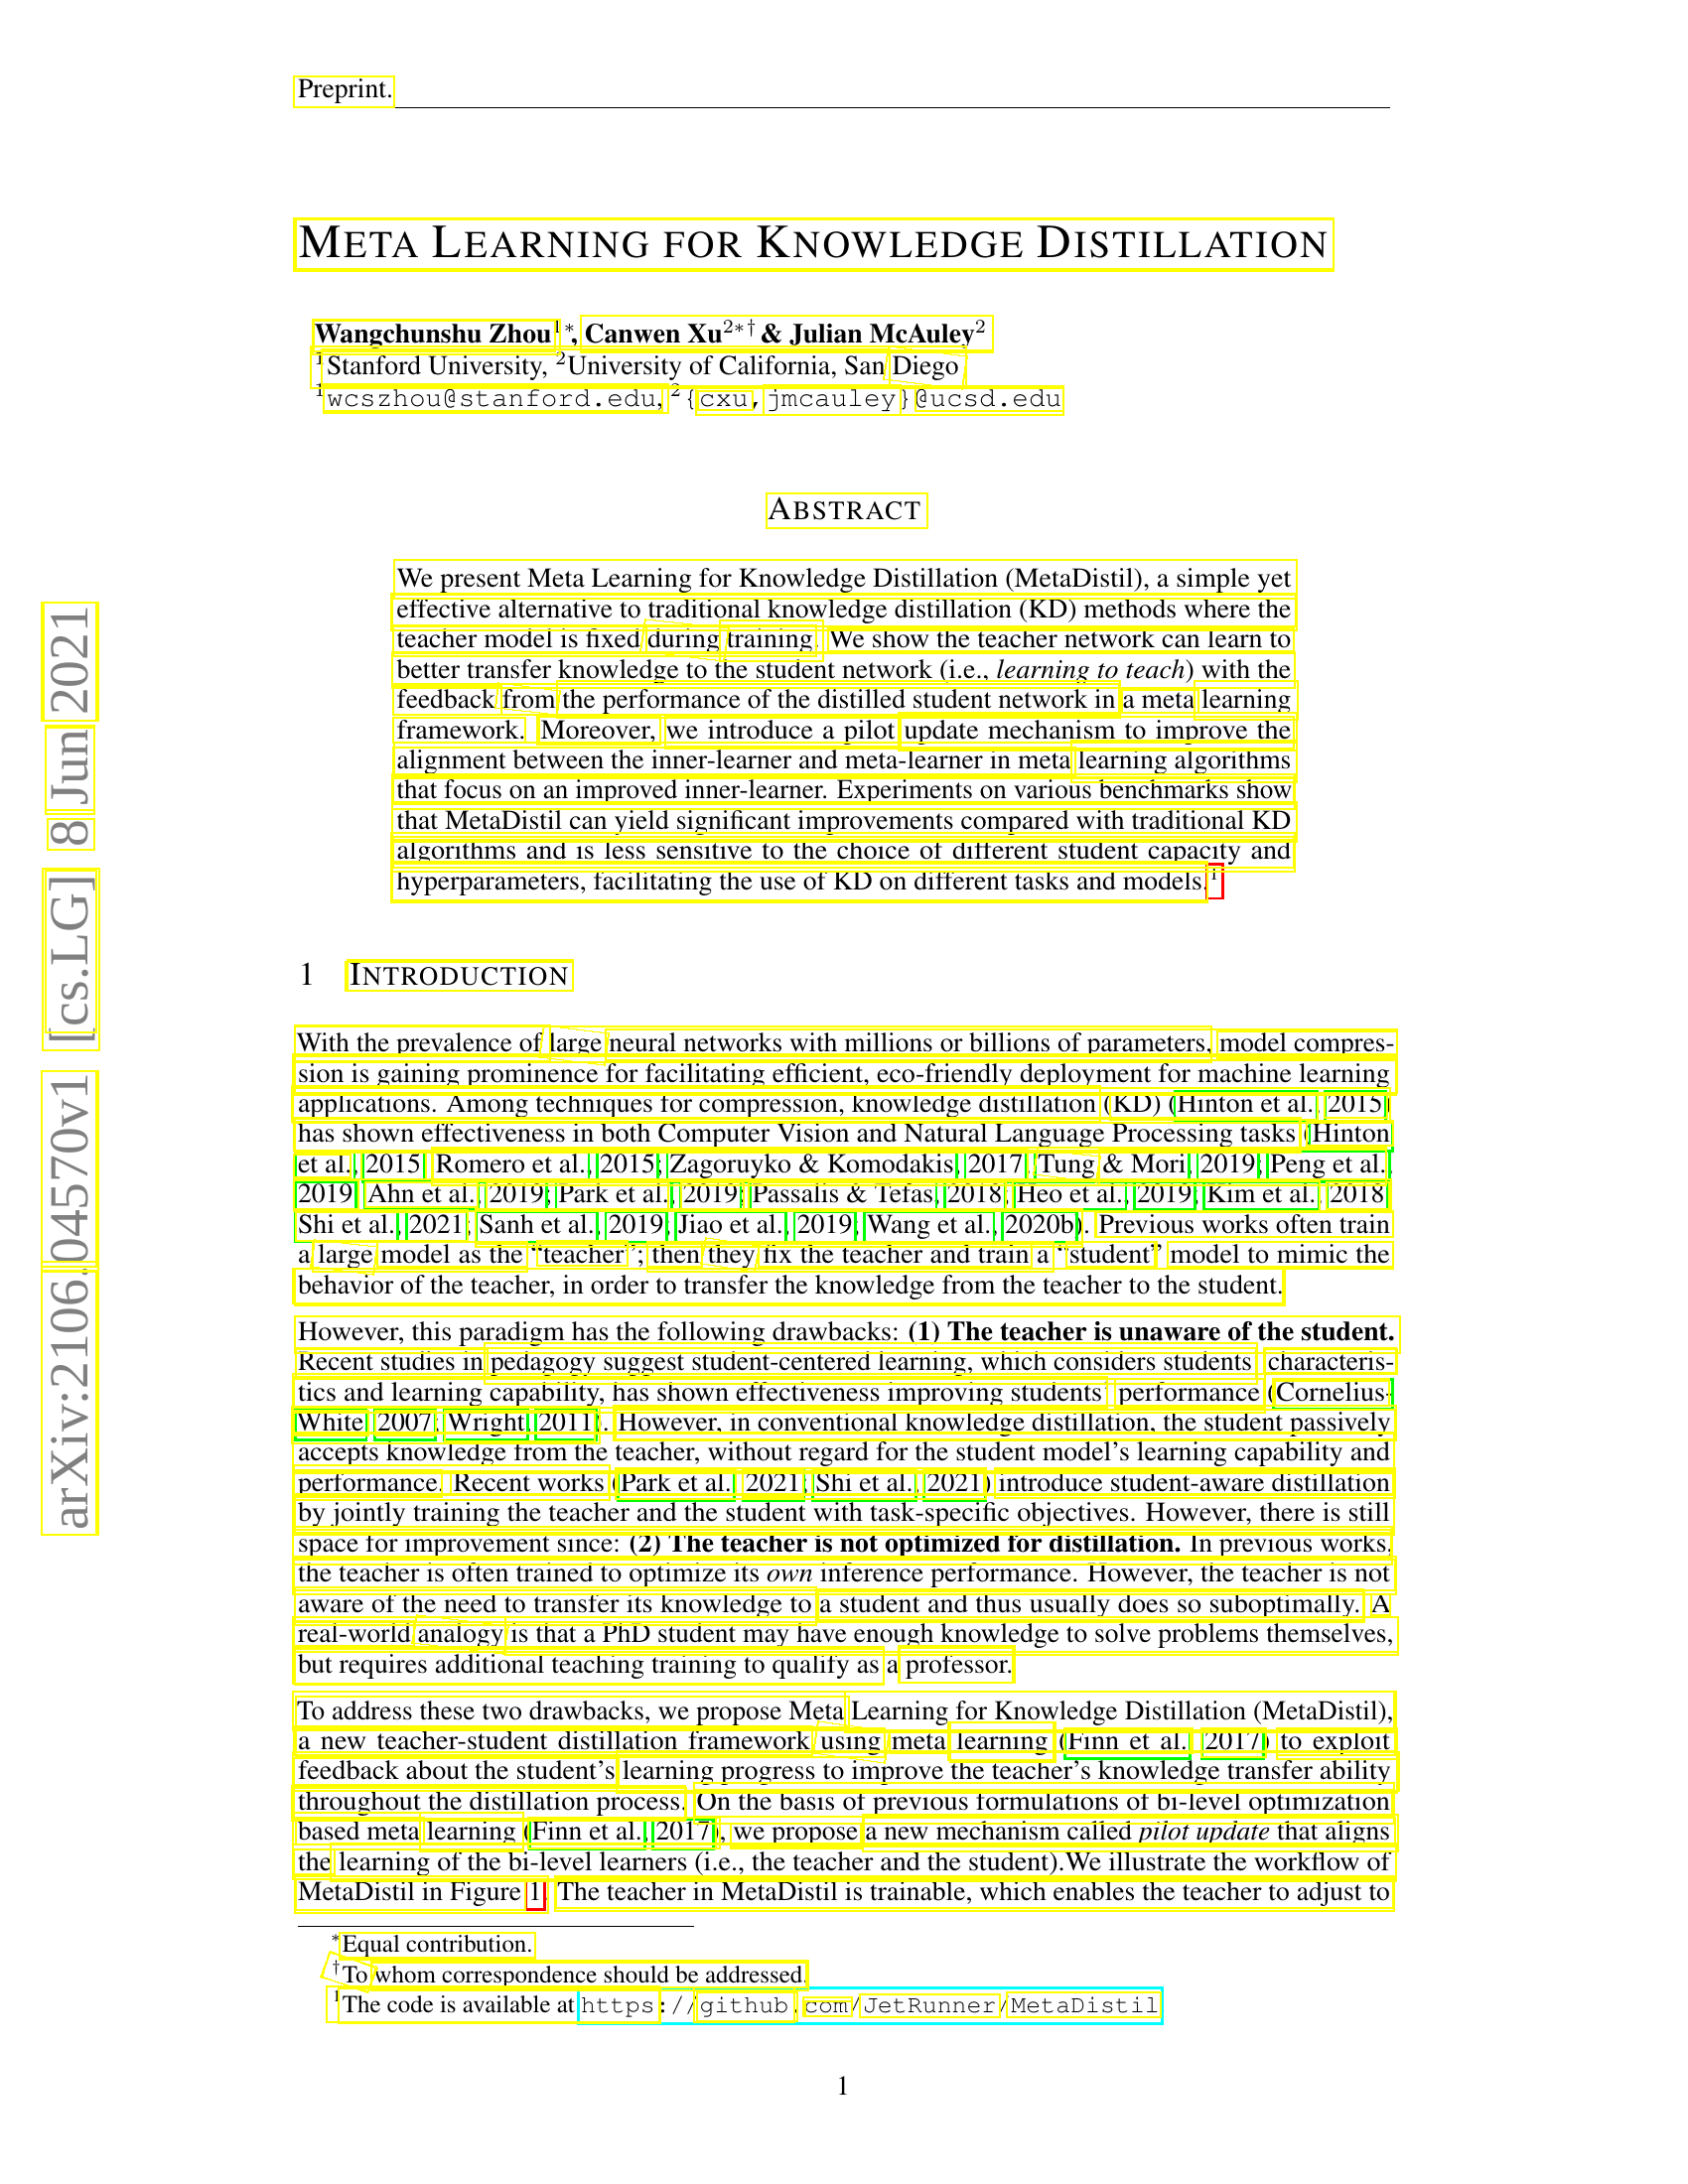

In [ ]:
def drawbox(image,bounds,color='yellow',width=2):
  draw= ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 =bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0],fill= color,width=width)
  return image

drawbox(image[0],bounds)

8. Text variable is combining all the extracted text into strings from array bounds.

In [ ]:
text=''
for i in range(len(bounds)):
  text=text+bounds[i][1]+"\n"

print(text)
 

Preprint:
META LEARNING FOR KNOWLEDGE DISTILLATION
Wangchunshu Zhoul
Canwen Xu2*t & Julian McAuley2
1Stanford University, ?University of California, San Diego
wcszhou@stanford.edu,
cxu, jmcauley} @ucsd.edu
ABSTRACT
We present Meta Learning for Knowledge Distillation (MetaDistil), a simple yet
effective alternative to traditional knowledge distillation (KD) methods where the
teacher model is fixed
training:
We show the teacher network can learn to
3
better transfer knowledge to the student network (i.e-, learning to teach) with the
feedback
the performance of the distilled student network in
a meta
learning
framework
Moreover;
we introduce a pilot update mechanism to improve the
4
alignment between the inner-learner and meta-learner in meta
learning algorithms
that focus on an improved inner-learner: Experiments on various benchmarks show
OO
that MetaDistil can yield significant improvements compared with traditional KD
algorithms and is less sensitive to the choice of different student

9. Now, the text is written into the speech.txt file so that it can be converted into the audio.

In [ ]:
with open("speech.txt",'w+') as f:
    for i in text:
        f.write("%s" %i)

10. This code is used to clean all the non-alphanumric characters from the file and insert whitespace instead.

In [ ]:
string = open('speech.txt').read()
newstring = re.sub('[^a-zA-Z0-9\n\.]', ' ', string)
open('speech.txt', 'w').write(newstring)

11. Using Google Text to speech api for converting text of speech,txt into the audio.

In [ ]:
with open("speech.txt") as file:
    line = file.read()

ob = gTTS(text=line, lang='en',slow=False)

ob.save("audio.mp3")

'''playsound.playsound("aud.mp3",True)

os.remove("aud.mp3")
'''

'playsound.playsound("aud.mp3",True)\n\nos.remove("aud.mp3")\n'